In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.shape

(404290, 6)

In [8]:
#taking only 60000 samples out of this
new_df = df.sample(60000, random_state=2)

In [9]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [10]:
new_df.dropna(how = 'any', axis = 0, inplace = True)

In [11]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
#checking for duplicates
new_df.duplicated().sum()

np.int64(0)

In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


is_duplicate
0    37936
1    22063
Name: count, dtype: int64
is_duplicate
0    63.22772
1    36.77228
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

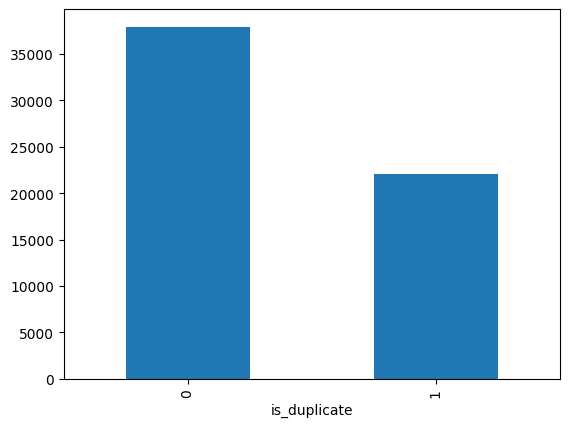

In [14]:
#distribution of duplicates and non-duplicate 
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)  #dono class k counts ko TOTAL count se divide krke * 100
new_df['is_duplicate'].value_counts().plot(kind = 'bar')

In [15]:
#repeated questions

qid = pd.Series(new_df['question1'].tolist() + new_df['question2'].tolist())  #dono columns ko ek long list meh convert krke ek pandas series meh convert krde raha h
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts() > 1  #jo question ek se zada baar repeat huyi h
print('Number of questions getting repeated', x[x].shape[0])   #x[x] return those elements jaha x true h


Number of unique questions 104925
Number of questions getting repeated 9667


In [16]:
qid.value_counts()

What are the best ways to lose weight?                                                                                                     20
How can I lose weight quickly?                                                                                                             18
Why do so may people ask questions on Quora that can easily be found by a simple Google searh?                                             15
How should I lose weight?                                                                                                                  14
Why do people ask questions here in Quora instead of just googling?                                                                        14
                                                                                                                                           ..
What is a diamond's melting point?                                                                                                          1
What i

In [17]:
print(x)

What are the best ways to lose weight?                                                                                                      True
How can I lose weight quickly?                                                                                                              True
Why do so may people ask questions on Quora that can easily be found by a simple Google searh?                                              True
How should I lose weight?                                                                                                                   True
Why do people ask questions here in Quora instead of just googling?                                                                         True
                                                                                                                                           ...  
What is a diamond's melting point?                                                                                                

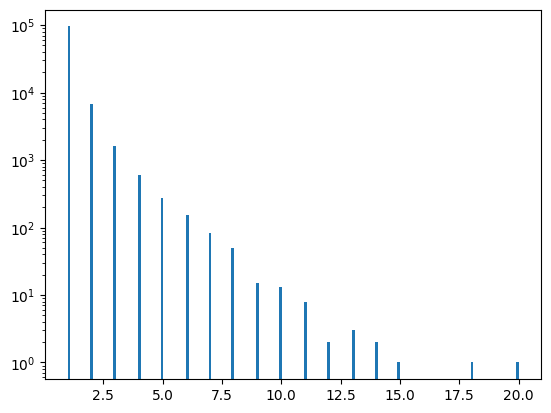

In [18]:
#histogram

plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()

In [19]:
qid.value_counts().values

array([20, 18, 15, ...,  1,  1,  1])

## Feature Engineering

In [20]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

Counts length of characters of each questions

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [22]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))  #basically harr row pe len(words) lagao. split(" ")-->["what", "is", "ai"]
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


Basically number of words per question

In [23]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [24]:
new_df['word_common'] = new_df.apply(common_words, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [25]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))  #set of unique, lowercase words from question1.
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))  #set of unique, lowercase words from question2.
    return (len(w1) + len(w2))

In [26]:
new_df['word_total'] = new_df.apply(total_words, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [27]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'], 2)  #ratio of similarity between qsn1 and qsn2
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


Example:

word_share = common_words / total_unique_words

Q1: "how are you"
Q2: "how you doing"

Common words = {"how", "you"} → 2

word_total
→ dono questions ke total unique words
Example:
{"how", "are", "you", "doing"} → 4

word_share = 2 / 4 = 0.5

## Analysis of Features